In [17]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

from hamiltonians import htotal
from utils import entanglement_entropy, nphotons_operator, expval

In [6]:
Omegavals = np.linspace(0.4, 10, 30)
g = 0.35
hop = np.array([1, 2])
Ncells = 12
nmax = 30

h = []

for (i, Omega) in enumerate(Omegavals):
    h.append(htotal(hop, g, Omega, Ncells, nmax)[:])

h = np.array(h)


In [7]:
aval, avec = np.linalg.eigh(h)

In [9]:
index_state_an = [2*Ncells - 1, 4*Ncells - 1, 6*Ncells - 1, 12*Ncells - 1]
ent_anomalous = []
for st in index_state_an:
    result = entanglement_entropy(st, avec, nmax, Ncells, Omegavals)
    ent_anomalous.append(result[0])

index_state_sg = [Ncells - 1, 3*Ncells - 1, 5*Ncells - 1, 11*Ncells - 1]
ent_singlepart = []
for st in index_state_sg:
    result = entanglement_entropy(st, avec, nmax, Ncells, Omegavals)
    ent_singlepart.append(result[0])

Text(0, 0.5, '$S_{\\text{lm}}$')

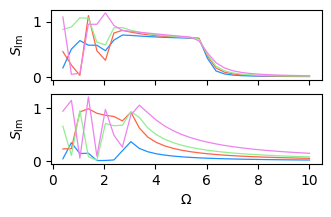

In [11]:
fig, ax = plt.subplots(2,1, figsize = (3.5, 2), sharex = True)

color_list = ['dodgerblue', 'tomato', 'lightgreen', 'violet']
index_state_an = [2*Ncells - 1, 4*Ncells - 1, 6*Ncells - 1, 12*Ncells - 1]
index_state_sg = [Ncells - 1, 3*Ncells - 1, 5*Ncells - 1, 11*Ncells - 1]

lw = 0.9
for i, index in enumerate(index_state_an):
    ax[0].plot(Omegavals, ent_anomalous[i], linewidth = lw, color = color_list[i], label = f'{int((index + 1)/(2*Ncells))}')
for i, index in enumerate(index_state_sg):
    ax[1].plot(Omegavals, ent_singlepart[i], linewidth = lw, color = color_list[i], label = f'{int((index + 1)/(2*Ncells))}')

ax[1].set_xlabel(r"$\Omega$")
ax[0].set_ylabel(r"$S_{\text{lm}}$")
ax[1].set_ylabel(r"$S_{\text{lm}}$")

In [18]:
slist = np.array([0, 2*Ncells - 1])
nph = nphotons_operator(Ncells, nmax)
numeroP = np.zeros([np.size(Omegavals), 2*Ncells*(nmax + 1)], dtype = 'complex')

for i in range(0, np.size(Omegavals)):
    for j in range(0, 2*Ncells*(nmax + 1)):
        numeroP[i,j] = expval(avec[i][:, j], nph)
 

Text(0, 0.5, '$\\langle n \\rangle $')

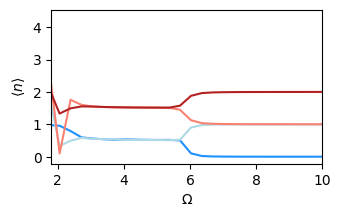

In [24]:
fig, ax = plt.subplots(1,1, figsize = (3.5, 2), sharex = True)
ax.plot(Omegavals, np.real(numeroP[:,2*Ncells - 1]), color = 'dodgerblue', label= '$\#$ Anomalous gap $1$')
ax.plot(Omegavals, np.real(numeroP[:,2*Ncells]), color = 'lightblue', label= '$\#$ Anomalous gap $1$')
ax.plot(Omegavals, np.real(numeroP[:,4*Ncells - 1]), color = 'salmon', label= '$\#$ Anomalous gap $2$')
ax.plot(Omegavals, np.real(numeroP[:,4*Ncells]), color = 'firebrick', label= '$\#$ Anomalous gap $2$')
ax.set_xlim([1.8, 10])
ax.set_xlabel(r"$\Omega$")
ax.set_ylabel(r"$\langle n \rangle $")